# Identify Candlestick Patterns

## Import relevant libraries

In [202]:
import os
import pandas as pd
import talib
import mplfinance as mpf
import numpy as np
import matplotlib.pyplot as plt
import datetime

## Get the data

In [2]:
df = pd.read_csv('../data/binance_BTCUSDT_1m_from_2020_01_01_to_2021_12_31.csv')

In [8]:
df.columns

Index(['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_asset_volumne', 'number_of_trades',
       'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volumne',
       'ignore', 'formatted_open_time', 'formatted_close_time', 'upper_shadow',
       'lower_shadow', 'real_body', 'CDLINVERTEDHAMMER', 'CDLHAMMER',
       'CDLPIERCING', 'CDLMORNINGSTAR', 'CDLSHOOTINGSTAR', 'CDLHANGINGMAN',
       'CDLDARKCLOUDCOVER', 'CDLEVENINGSTAR'],
      dtype='object')

## Identify Candlestick Patterns

In [3]:
candle_names = talib.get_function_groups()['Pattern Recognition']

- Inverted Hammer --> Single [Bullish]
- Hammer --> Single [Bullish]
- Bullish Engulfing (not available at ta-lib) --> Double [Bullish]
- Piercing Pattern --> Double [Bullish]
- Morning Star --> Triple [Bullish]


- Shooting Star --> Single [Bearish]
- Hanging Man --> Single [Bearish]
- Bearish Engulfing (not available at ta-lib) --> Double [Bearish]
- Dark Cloud Cover --> Double [Bearish]
- Evening Star --> Triple [Bearish]

In [4]:
candle_names = [
    'CDLINVERTEDHAMMER',
    'CDLHAMMER',
    'CDLPIERCING',
    'CDLMORNINGSTAR',
    'CDLSHOOTINGSTAR',
    'CDLHANGINGMAN',
    'CDLDARKCLOUDCOVER',
    'CDLEVENINGSTAR',
]

In [5]:
# extract OHLC 
op = df['open']
hi = df['high']
lo = df['low']
cl = df['close']

# create columns for each pattern
for candle in candle_names:
    # below is same as;
    # df["CDL3LINESTRIKE"] = talib.CDL3LINESTRIKE(op, hi, lo, cl)
    df[candle] = getattr(talib, candle)(op, hi, lo, cl)

In [18]:
df.sample(10)

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,lower_shadow,real_body,CDLINVERTEDHAMMER,CDLHAMMER,CDLPIERCING,CDLMORNINGSTAR,CDLSHOOTINGSTAR,CDLHANGINGMAN,CDLDARKCLOUDCOVER,CDLEVENINGSTAR
317210,1596923520000,11748.30,11750.02,11741.42,11742.29,24.587999,1596923579999,2.888698e+05,588,12.121456,...,0.87,6.01,0,0,0,0,0,0,0,0
304191,1596142380000,11149.51,11150.81,11128.40,11131.62,69.049223,1596142439999,7.690083e+05,1007,27.770642,...,3.22,17.89,0,0,0,0,0,0,0,0
435114,1603997760000,13581.22,13581.23,13559.20,13559.95,45.360237,1603997819999,6.156453e+05,620,15.467246,...,0.75,21.27,0,0,0,0,0,0,0,0
568073,1611996300000,34023.63,34092.34,34009.51,34018.93,70.073137,1611996359999,2.385596e+06,1222,36.493446,...,9.42,4.70,0,0,0,0,0,0,0,0
837448,1628194980000,40880.10,40952.60,40880.10,40942.73,32.665726,1628195039999,1.337112e+06,751,18.707230,...,0.00,62.63,0,0,0,0,0,0,0,0
760339,1623568440000,35316.64,35405.00,35316.64,35357.16,36.062681,1623568499999,1.275188e+06,753,24.371198,...,0.00,40.52,0,0,0,0,0,0,0,0
685424,1619056500000,54158.65,54181.69,54105.72,54164.72,54.439898,1619056559999,2.947973e+06,1660,27.351902,...,52.93,6.07,0,0,0,0,0,0,0,0
504599,1608170460000,21748.59,21748.60,21706.47,21708.11,67.319645,1608170519999,1.462498e+06,1217,24.587934,...,1.64,40.48,0,0,0,0,0,0,0,0
123324,1585268760000,6828.22,6829.30,6821.43,6826.60,54.084584,1585268819999,3.691788e+05,481,22.613646,...,5.17,1.62,0,0,0,0,0,0,0,0
718983,1621087080000,48958.78,49011.41,48920.51,48942.04,50.737918,1621087139999,2.484231e+06,1250,19.210044,...,21.53,16.74,0,0,0,0,0,0,0,0


## Export the Data

In [203]:
asset_ticket = "BTCUSDT"
timestamp = "1m"
start_date = "1 Jan, 2020"
end_date = "31 Dec, 2021"

### Export parameters

In [204]:
export_path = "../data"
export_filename = "binance" + \
                  "_" + asset_ticket + \
                  "_" + timestamp + \
                  "_from_" + datetime.datetime.strptime(start_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_to_" + datetime.datetime.strptime(end_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_candlesticks_signals_raw"
export_extension = ".csv"
full_export_path = os.path.join(export_path, export_filename + export_extension)

### Export

In [205]:
df.to_csv(full_export_path, index=False)

## Analyse and plot the data!

In [190]:
start_date_filter = '2021-12-30 20:00:00'
end_date_filter = '2021-12-31 00:00:00'

### Get the OHLC Data

In [28]:
df_ohlc = df[['formatted_open_time', 'open', 'high', 'low', 'close', 'volume']]

In [29]:
df_ohlc.index = pd.DatetimeIndex(df_ohlc['formatted_open_time'])

In [31]:
df_ohlc = df_ohlc[['open', 'high', 'low', 'close', 'volume']]

In [32]:
df_ohlc.head()

,open,high,low,close,volume
formatted_open_time,,,,,
2020-01-01 00:00:00,7195.24,7196.25,7183.14,7186.68,51.642812
2020-01-01 00:01:00,7187.67,7188.06,7182.20,7184.03,7.248148
2020-01-01 00:02:00,7184.41,7184.71,7180.26,7182.43,11.681677
2020-01-01 00:03:00,7183.83,7188.94,7182.49,7185.94,10.025391
2020-01-01 00:04:00,7185.54,7185.54,7178.64,7179.78,14.911105


#### Filter the data

In [191]:
df_ohlc_filtered= df_ohlc[(df_ohlc.index >= start_date_filter) & (df_ohlc.index <= end_date_filter)]

In [55]:
df_ohlc_filtered

,open,high,low,close,volume
formatted_open_time,,,,,
2021-12-30 20:00:00,47558.35,47558.85,47504.84,47547.90,29.36060
2021-12-30 20:01:00,47547.91,47590.28,47547.90,47575.08,13.03263
2021-12-30 20:02:00,47575.08,47589.24,47517.81,47525.48,16.36255
2021-12-30 20:03:00,47525.47,47537.06,47500.00,47537.05,18.08378
2021-12-30 20:04:00,47537.06,47537.06,47469.34,47496.96,43.12949
...,...,...,...,...,...
2021-12-30 23:56:00,47098.19,47147.14,47098.18,47134.56,6.49057
2021-12-30 23:57:00,47134.56,47161.69,47129.96,47144.56,4.78281
2021-12-30 23:58:00,47144.56,47147.89,47122.96,47139.98,4.15772


#### Plot the data

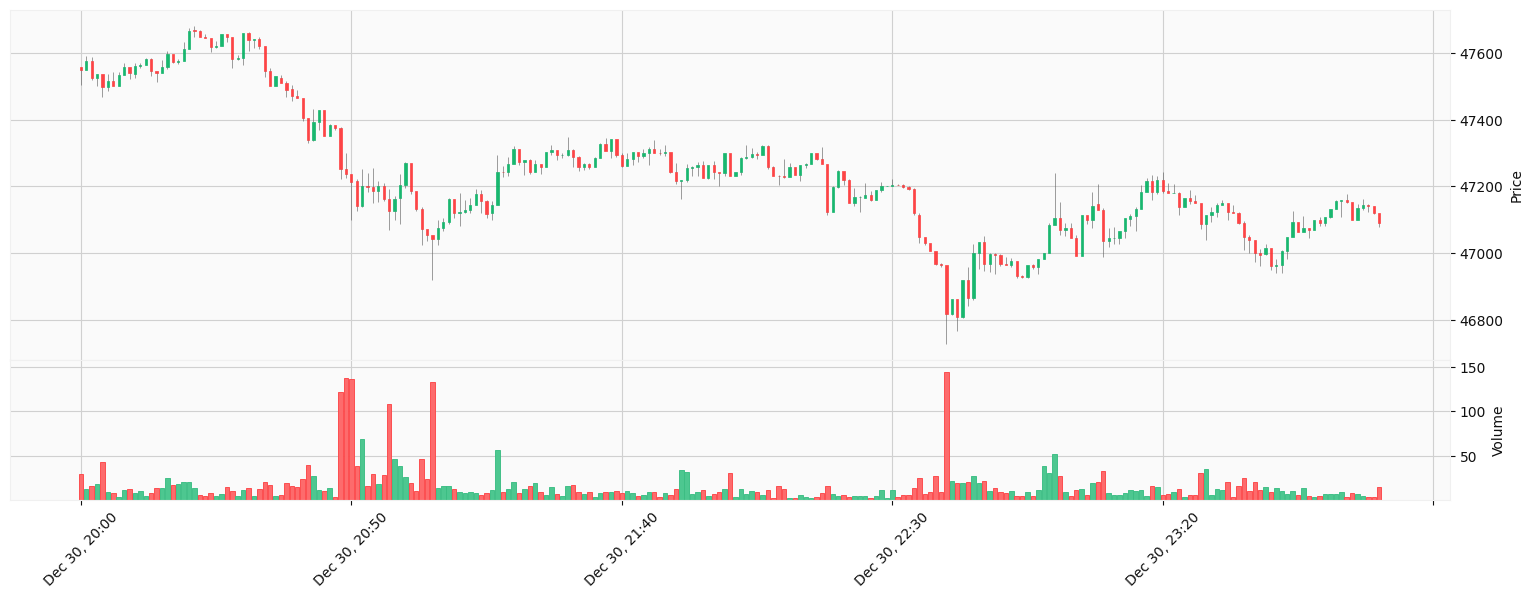

In [139]:
mpf.plot(df_ohlc_filtered, type='candle', style="yahoo", volume=True, figsize=(20,7))

### Get the Candlesticks patterns

In [99]:
df_candles_patterns = df[['formatted_open_time', 'CDLINVERTEDHAMMER', 'CDLHAMMER', 'CDLPIERCING', 'CDLMORNINGSTAR', 'CDLSHOOTINGSTAR', 'CDLHANGINGMAN', 'CDLDARKCLOUDCOVER', 'CDLEVENINGSTAR']]

In [100]:
df_candles_patterns.index = pd.DatetimeIndex(df_candles_patterns['formatted_open_time'])

In [101]:
df_candles_patterns = df_candles_patterns[['CDLINVERTEDHAMMER', 'CDLHAMMER', 'CDLPIERCING', 'CDLMORNINGSTAR', 'CDLSHOOTINGSTAR', 'CDLHANGINGMAN', 'CDLDARKCLOUDCOVER', 'CDLEVENINGSTAR']]

#### Filter the data

In [102]:
df_candles_patterns_filtered = df_candles_patterns[(df_candles_patterns.index >= start_date_filter) & (df_candles_patterns.index <= end_date_filter)]

#### Identify the lines with candlestick pattern signal

In [103]:
df_candles_patterns_filtered['candlestick_pattern_signal'] = df_candles_patterns_filtered.sum(axis=1)

/var/folders/s0/_j22qz4n5j72grfwwy9xgbxc0000gn/T/ipykernel_65273/450958164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_candles_patterns_filtered['candlestick_pattern_signal'] = df_candles_patterns_filtered.sum(axis=1)


In [121]:
#df_candles_patterns_filtered['candlestick_pattern_signal'] = df_candles_patterns_filtered['candlestick_pattern_signal'].replace(0, np.nan)

In [133]:
#df_candles_patterns_filtered_only_events = df_candles_patterns_filtered.loc[~(df_candles_patterns_filtered==0).all(axis=1)]

In [134]:
#df_candles_patterns_filtered_only_events

#### Plot the data

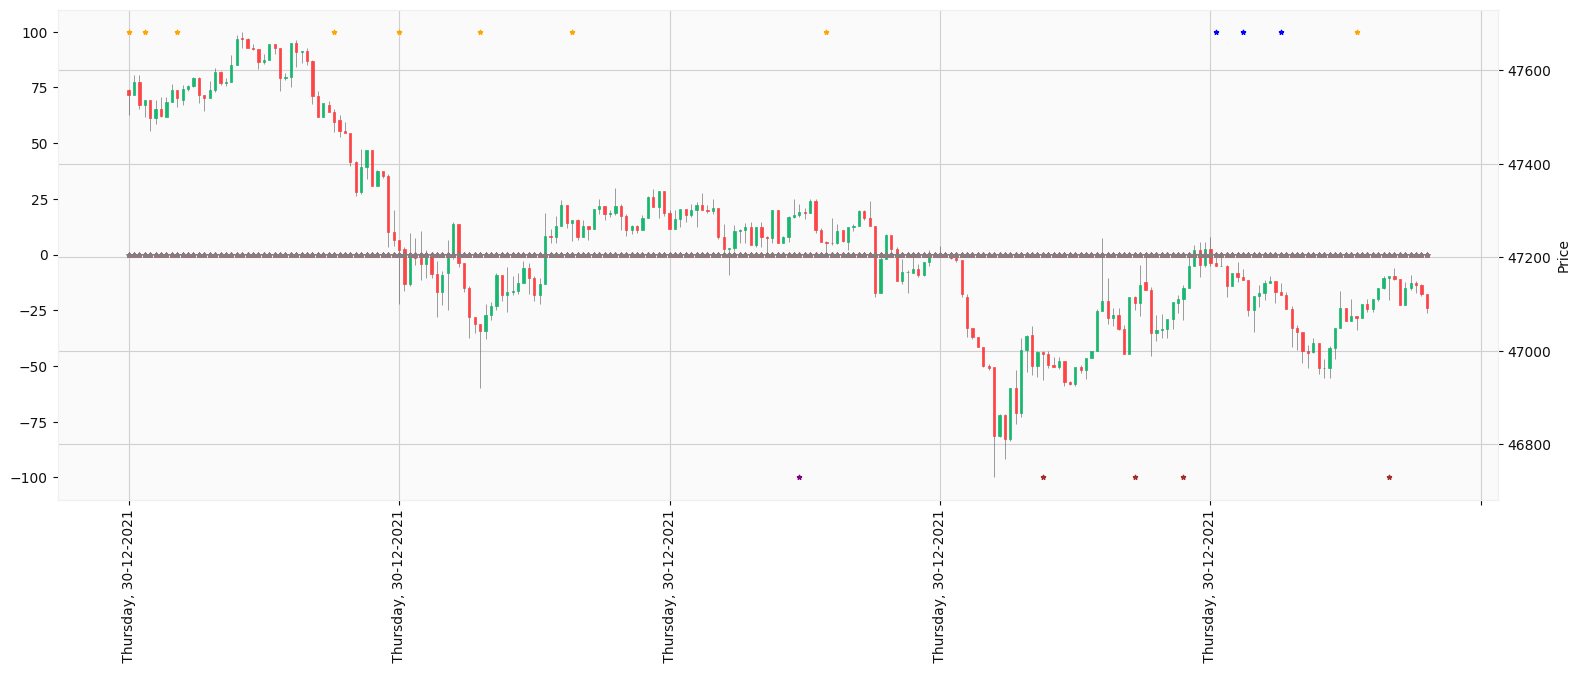

In [143]:
apds = [ mpf.make_addplot(df_candles_patterns_filtered['CDLINVERTEDHAMMER'], type="scatter", markersize=10, marker='*', color="blue"),
         mpf.make_addplot(df_candles_patterns_filtered['CDLHAMMER'], type="scatter", markersize=10, marker='*', color="orange"),
         mpf.make_addplot(df_candles_patterns_filtered['CDLPIERCING'], type="scatter", markersize=10, marker='*', color="green"),
         mpf.make_addplot(df_candles_patterns_filtered['CDLMORNINGSTAR'], type="scatter", markersize=10, marker='*', color="red"),
         mpf.make_addplot(df_candles_patterns_filtered['CDLSHOOTINGSTAR'], type="scatter", markersize=10, marker='*', color="purple"),
         mpf.make_addplot(df_candles_patterns_filtered['CDLHANGINGMAN'], type="scatter", markersize=10, marker='*', color="brown"),
         mpf.make_addplot(df_candles_patterns_filtered['CDLDARKCLOUDCOVER'], type="scatter", markersize=10, marker='*', color="pink"),
         mpf.make_addplot(df_candles_patterns_filtered['CDLEVENINGSTAR'], type="scatter", markersize=10, marker='*', color="grey"),                  
       ]

# apds = [ mpf.make_addplot(df_candles_patterns_filtered['CDLINVERTEDHAMMER'], type="scatter", markersize=10, marker='*', panel=1, color="blue"),
#          mpf.make_addplot(df_candles_patterns_filtered['CDLHAMMER'], type="scatter", markersize=10, marker='*', panel=1, color="orange"),
#          mpf.make_addplot(df_candles_patterns_filtered['CDLPIERCING'], type="scatter", markersize=10, marker='*', panel=1, color="green"),
#          mpf.make_addplot(df_candles_patterns_filtered['CDLMORNINGSTAR'], type="scatter", markersize=10, marker='*', panel=1, color="red"),
#          mpf.make_addplot(df_candles_patterns_filtered['CDLSHOOTINGSTAR'], type="scatter", markersize=10, marker='*', panel=1, color="purple"),
#          mpf.make_addplot(df_candles_patterns_filtered['CDLHANGINGMAN'], type="scatter", markersize=10, marker='*', panel=1, color="brown"),
#          mpf.make_addplot(df_candles_patterns_filtered['CDLDARKCLOUDCOVER'], type="scatter", markersize=10, marker='*', panel=1, color="pink"),
#          mpf.make_addplot(df_candles_patterns_filtered['CDLEVENINGSTAR'], type="scatter", markersize=10, marker='*', panel=1, color="grey"),                  
#        ]

mpf.plot(df_ohlc_filtered, type='candle', style='yahoo', addplot=apds, figsize=(20,7), datetime_format=' %A, %d-%m-%Y', xrotation=90)

### Get the OHLC and Candlesticks patterns

In [159]:
df_ohcl_candles_patterns = df[['formatted_open_time','open', 'high', 'low', 'close', 'volume', 'CDLINVERTEDHAMMER', 'CDLHAMMER', 'CDLPIERCING', 'CDLMORNINGSTAR', 'CDLSHOOTINGSTAR', 'CDLHANGINGMAN', 'CDLDARKCLOUDCOVER', 'CDLEVENINGSTAR']]

In [160]:
df_ohcl_candles_patterns.index = pd.DatetimeIndex(df_ohcl_candles_patterns['formatted_open_time'])

In [161]:
df_ohcl_candles_patterns = df_ohcl_candles_patterns[['open', 'high', 'low', 'close', 'volume', 'CDLINVERTEDHAMMER', 'CDLHAMMER', 'CDLPIERCING', 'CDLMORNINGSTAR', 'CDLSHOOTINGSTAR', 'CDLHANGINGMAN', 'CDLDARKCLOUDCOVER', 'CDLEVENINGSTAR']]

In [179]:
df_ohcl_candles_patterns_only_events = df_ohcl_candles_patterns.loc[~(df_ohcl_candles_patterns[['CDLINVERTEDHAMMER', 'CDLHAMMER', 'CDLPIERCING', 'CDLMORNINGSTAR', 'CDLSHOOTINGSTAR', 'CDLHANGINGMAN', 'CDLDARKCLOUDCOVER', 'CDLEVENINGSTAR']]==0).all(axis=1)]

In [181]:
df_ohcl_candles_patterns_only_events.head()

,open,high,low,close,volume,CDLINVERTEDHAMMER,CDLHAMMER,CDLPIERCING,CDLMORNINGSTAR,CDLSHOOTINGSTAR,CDLHANGINGMAN,CDLDARKCLOUDCOVER,CDLEVENINGSTAR
formatted_open_time,,,,,,,,,,,,,
2020-01-01 00:18:00,7180.00,7180.22,7177.35,7179.16,4.531595,0,100,0,0,0,0,0,0
2020-01-01 00:34:00,7180.60,7181.88,7180.39,7180.68,4.827577,100,0,0,0,0,0,0,0
2020-01-01 00:50:00,7182.94,7183.98,7181.07,7183.92,5.435960,0,0,0,0,0,-100,0,0
2020-01-01 01:15:00,7190.46,7191.21,7189.23,7191.20,7.022299,0,100,0,0,0,0,0,0
2020-01-01 01:17:00,7191.53,7192.59,7191.34,7191.47,4.787679,100,0,0,0,0,0,0,0


In [189]:
df_ohcl_candles_patterns_only_events.describe()

,open,high,low,close,volume,CDLINVERTEDHAMMER,CDLHAMMER,CDLPIERCING,CDLMORNINGSTAR,CDLSHOOTINGSTAR,CDLHANGINGMAN,CDLDARKCLOUDCOVER,CDLEVENINGSTAR
count,77791.000000,77791.000000,77791.000000,77791.000000,77791.000000,77791.000000,77791.000000,77791.000000,77791.000000,77791.000000,77791.000000,77791.000000,77791.000000
mean,28214.962057,28225.679626,28193.828653,28214.192985,41.475367,9.076886,44.421591,0.362510,4.558368,-10.798164,-28.408171,-0.548907,-4.459385
std,19571.587327,19579.095106,19556.307037,19571.176934,52.740723,28.728197,49.688158,6.009994,20.858180,31.035922,45.097883,7.388509,20.641169
min,4213.660000,4219.990000,4106.420000,4194.050000,0.668132,0.000000,0.000000,0.000000,0.000000,-100.000000,-100.000000,-100.000000,-100.000000
25%,9638.175000,9640.000000,9634.290000,9637.190000,15.813184,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,0.000000
50%,19229.090000,19232.390000,19217.500000,19228.000000,27.026608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47451.870000,47466.305000,47409.130000,47452.055000,47.049930,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,68693.250000,68708.240000,68600.010000,68605.910000,1392.908182,100.000000,100.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000


In [192]:
df_ohcl_candles_patterns_only_events[df_ohcl_candles_patterns_only_events['CDLMORNINGSTAR'] == 100]

,open,high,low,close,volume,CDLINVERTEDHAMMER,CDLHAMMER,CDLPIERCING,CDLMORNINGSTAR,CDLSHOOTINGSTAR,CDLHANGINGMAN,CDLDARKCLOUDCOVER,CDLEVENINGSTAR
formatted_open_time,,,,,,,,,,,,,
2020-01-01 07:30:00,7231.04,7232.68,7230.99,7232.68,4.362601,0,0,0,100,0,0,0,0
2020-01-01 09:26:00,7194.07,7196.74,7192.66,7196.14,13.769310,0,0,0,100,0,0,0,0
2020-01-01 12:12:00,7208.65,7213.06,7208.33,7212.88,7.581551,0,0,0,100,0,0,0,0
2020-01-01 13:41:00,7226.53,7231.41,7226.50,7230.85,10.633182,0,0,0,100,0,0,0,0
2020-01-01 14:47:00,7219.89,7224.41,7219.89,7223.33,17.159653,0,0,0,100,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-29 03:40:00,47945.29,47971.95,47936.57,47966.98,25.605810,0,0,0,100,0,0,0,0
2021-12-29 17:41:00,47633.32,47659.19,47630.37,47659.19,20.516520,0,0,0,100,0,0,0,0
2021-12-30 02:32:00,46468.91,46529.82,46443.16,46520.39,11.758500,0,0,0,100,0,0,0,0


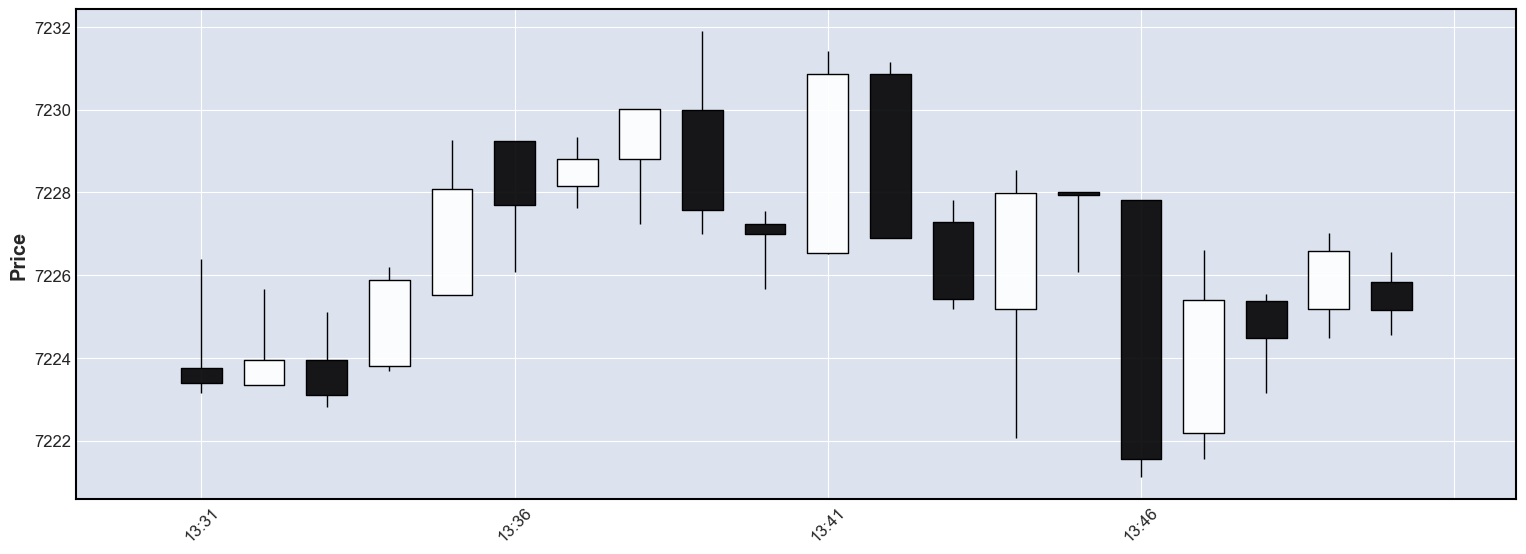

In [201]:
idx = df_ohcl_candles_patterns.index.get_loc('2020-01-01 13:41:00')
df_temp = df_ohcl_candles_patterns.iloc[idx - 10 : idx + 10]
mpf.plot(df_temp, type='candle', figsize=(20,7))

#### Filter the data

In [162]:
df_ohcl_candles_patterns_filtered = df_ohcl_candles_patterns[(df_ohcl_candles_patterns.index >= start_date_filter) & (df_ohcl_candles_patterns.index <= end_date_filter)]

In [167]:
df_ohcl_candles_patterns_filtered

,open,high,low,close,volume,CDLINVERTEDHAMMER,CDLHAMMER,CDLPIERCING,CDLMORNINGSTAR,CDLSHOOTINGSTAR,CDLHANGINGMAN,CDLDARKCLOUDCOVER,CDLEVENINGSTAR
formatted_open_time,,,,,,,,,,,,,
2021-12-30 20:00:00,47558.35,47558.85,47504.84,47547.90,29.36060,0,100,0,0,0,0,0,0
2021-12-30 20:01:00,47547.91,47590.28,47547.90,47575.08,13.03263,0,0,0,0,0,0,0,0
2021-12-30 20:02:00,47575.08,47589.24,47517.81,47525.48,16.36255,0,0,0,0,0,0,0,0
2021-12-30 20:03:00,47525.47,47537.06,47500.00,47537.05,18.08378,0,100,0,0,0,0,0,0
2021-12-30 20:04:00,47537.06,47537.06,47469.34,47496.96,43.12949,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30 23:56:00,47098.19,47147.14,47098.18,47134.56,6.49057,0,0,0,0,0,0,0,0
2021-12-30 23:57:00,47134.56,47161.69,47129.96,47144.56,4.78281,0,0,0,0,0,0,0,0
2021-12-30 23:58:00,47144.56,47147.89,47122.96,47139.98,4.15772,0,0,0,0,0,0,0,0


In [172]:
df_ohcl_candles_patterns_filtered_only_events = df_ohcl_candles_patterns_filtered.loc[~(df_ohcl_candles_patterns_filtered[['CDLINVERTEDHAMMER', 'CDLHAMMER', 'CDLPIERCING', 'CDLMORNINGSTAR', 'CDLSHOOTINGSTAR', 'CDLHANGINGMAN', 'CDLDARKCLOUDCOVER', 'CDLEVENINGSTAR']]==0).all(axis=1)]

In [178]:
df_ohcl_candles_patterns_filtered_only_events

,open,high,low,close,volume,CDLINVERTEDHAMMER,CDLHAMMER,CDLPIERCING,CDLMORNINGSTAR,CDLSHOOTINGSTAR,CDLHANGINGMAN,CDLDARKCLOUDCOVER,CDLEVENINGSTAR
formatted_open_time,,,,,,,,,,,,,
2021-12-30 20:00:00,47558.35,47558.85,47504.84,47547.90,29.36060,0,100,0,0,0,0,0,0
2021-12-30 20:03:00,47525.47,47537.06,47500.00,47537.05,18.08378,0,100,0,0,0,0,0,0
2021-12-30 20:09:00,47556.83,47556.83,47521.14,47540.55,12.44710,0,100,0,0,0,0,0,0
2021-12-30 20:38:00,47511.36,47516.00,47466.66,47490.08,18.97500,0,100,0,0,0,0,0,0
2021-12-30 20:50:00,47235.98,47235.98,47100.00,47214.44,136.42795,0,100,0,0,0,0,0,0
2021-12-30 21:05:00,47056.08,47056.09,46919.44,47042.41,133.08844,0,100,0,0,0,0,0,0
2021-12-30 21:22:00,47272.31,47278.86,47234.46,47278.85,12.60143,0,100,0,0,0,0,0,0
2021-12-30 22:04:00,47289.26,47314.31,47285.78,47296.70,10.53285,0,0,0,0,-100,0,0,0
2021-12-30 22:09:00,47231.70,47233.57,47205.09,47230.16,15.89988,0,100,0,0,0,0,0,0


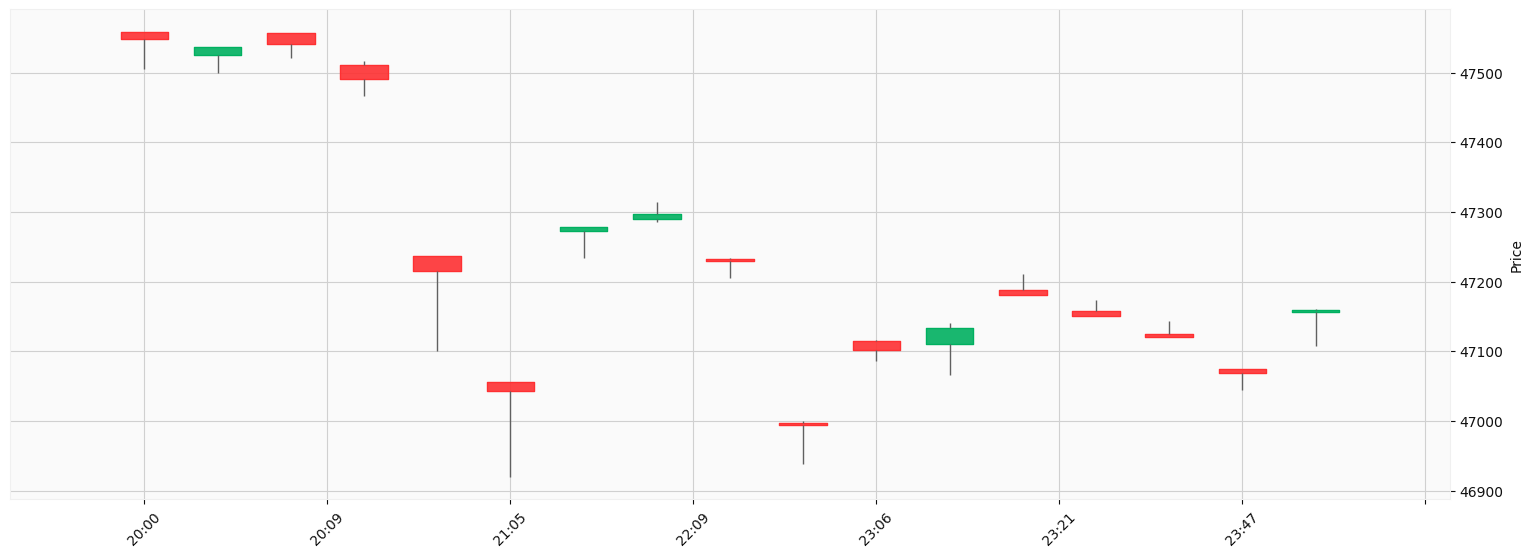

In [177]:
mpf.plot(df_ohcl_candles_patterns_filtered_only_events, type='candle', style="yahoo", figsize=(20,7))